In [1]:
#  Imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
from jupyterthemes import jtplot

from scipy.optimize import curve_fit

In [2]:
# MCEq Imports
from MCEq.particlemanager import ParticleManager
import MCEq.core 
from MCEq.core import MCEqRun
from MCEq.data import Decays
import mceq_config as config
#import primary model choices
import crflux.models as pm

In [3]:
# Silincing mceq, set to 1 or higher for output
config.debug_level = 0
# Launcing mceq
mceq_run = MCEqRun(
    #provide the string of the interaction model
    interaction_model='SIBYLL23CPP',
    #primary cosmic ray flux model
    primary_model = (pm.HillasGaisser2012, "H3a"),
    # Zenith angle in degrees. 0=vertical, 90=horizontal
    theta_deg=0.0
)


In [4]:
#list of particles in concern
list_particles=[mceq_run.pman[2212],     #p+           (0)
               mceq_run.pman[-2212],     #pbar-        (1)
                mceq_run.pman[2112],     #n            (2)
                mceq_run.pman[-2112],    #nbar         (3)
                mceq_run.pman[211],      #pi+          (4)
                mceq_run.pman[-211],     #pi-          (5)
                mceq_run.pman[310],      #K_S0         (6) 
                mceq_run.pman[130],      #K_L0         (7)
                mceq_run.pman[321],      #K+           (8)
                mceq_run.pman[-321],     #K-           (9)
                mceq_run.pman[111],      #pi0          (10)
                mceq_run.pman[-3122],    #Lambda_r0    (11)
                mceq_run.pman[3122],     #Lambda0      (12)
                mceq_run.pman[(13,0)],   #mu-          (13)
                mceq_run.pman[(-13,0)],  #mu+          (14)
                mceq_run.pman[-11],      #e+           (15)   
                mceq_run.pman[11],       #e-           (16)
                mceq_run.pman[(13,1)],   #mu-l         (17)
                mceq_run.pman[(13,-1)],  #mu-r         (18)
                mceq_run.pman[(-13,1)],  #mu+l         (19)
                mceq_run.pman[(-13,-1)], #mu+r         (20)
                mceq_run.pman[14],       #nue          (21)
                mceq_run.pman[-14],      #nuebar       (22)
                mceq_run.pman[12],       #numu         (23)
                mceq_run.pman[-12],      #numubar      (24) 
                mceq_run.pman[22]        #gamma        (25)
                       
         
               ]
#list of pdg ids 
list_particles_pdg_id=[]
for i in range(0,len(list_particles)):
    list_particles_pdg_id.append(list_particles[i].pdg_id)
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)

In [5]:
def f(x,a,b):
    return a*x**(-b)

In [6]:

"""""
The primary fluxes
"""""
phi=np.zeros(len(list_particles)*121)
phi0_p = (
    mceq_run._phi0[mceq_run.pman[2212].lidx:mceq_run.pman[2212].uidx]
)
phi0_n=(
    mceq_run._phi0[mceq_run.pman[2112].lidx:mceq_run.pman[2112].uidx]
)
phi[242:363]=phi0_n
phi[0:121]=phi0_p


In [7]:
pickle.dump(phi0_p,open("21,01,21_H3a.pkl","wb"))

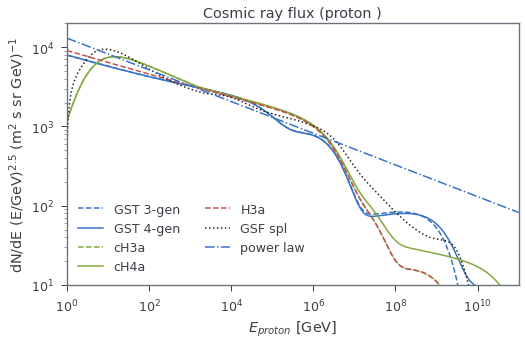

In [8]:
import crflux.models as mods
from matplotlib import pyplot as plt
pmodels = [
    (mods.GaisserStanevTilav, "3-gen", "GST 3-gen", "b", "--"),
    (mods.GaisserStanevTilav, "4-gen", "GST 4-gen", "b", "-"),
    (mods.CombinedGHandHG, "H3a", "cH3a", "g", "--"),
    (mods.CombinedGHandHG, "H4a", "cH4a", "g", "-"),
    (mods.HillasGaisser2012, "H3a", "H3a", "r", "--"),
   
    #    (GlobalSplineFit, None, 'GSF', "k", "-"),
    (mods.GlobalSplineFitBeta, None, 'GSF spl', "k", ":")
]

nfrac = {}
lnA = {}
evec = np.logspace(0, 11, 1000)
plt.figure(figsize=(7.5, 5))
plt.title('Cosmic ray flux (proton )')
for mclass, moptions, mtitle, color, ls in pmodels:

    pmod = mclass(moptions)
    pfrac, p, n = pmod.p_and_n_flux(evec)
    plt.plot(
        evec, (p) * evec**2.5,
        color=color,
        ls=ls,
        lw=1.5,
        label=mtitle)
    nfrac[mtitle] = (1 - pfrac)
    if isinstance(pmod, mods.GlobalSplineFitBeta):
        continue
    lnA[mtitle] = pmod.lnA(evec)
plt.plot(evec,np.vectorize(f)(evec,1.3*1e4,2.7)*evec**2.5,"-.",label="power law")
plt.loglog()
plt.xlabel(r"$E_{proton}$ [GeV]")
plt.ylabel(r"dN/dE (E/GeV)$^{2.5}$ (m$^{2}$ s sr GeV)$^{-1}$")
plt.legend(loc=0, frameon=False, numpoints=1, ncol=2)
plt.xlim([1, 1e11])
plt.ylim([10, 2e4])
plt.tight_layout()
plt.savefig('/home/kruteesh/Desktop/Solar_neutrinos/diffsec/pics/Pmodels.png')
